<a href="https://colab.research.google.com/github/MiniShark27/590T_Visuals/blob/main/Week_1_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notes:
- How to run: 
  - Run the code blocks in order until you get to the text are called "View Output Section"
  - Can customize the payoff matrix in its box when you get to it
  - Run one of the code blocks (or both) to see visual output
- How did I get here
  - I was looking into a way to make interactive charts/graphs in a python notebook
  - Realized that a major point of a python notebook is that you execute each block of code then never interface with it again until re-running it
  - Interactability goes against this is my reasoning for why I couldn't find a way to make interactive tables
  - If a library is found though, let me know
- Current Features:
  - Can identify nash eqaulibria in a 2 player game
  - Does this by checking every combination to see if neither player has a better response
  - Displys a coler coded table with a description to show if a cell represents a nash equalibrium
  - If it doesn't, it highlights the nash equalibrium
  - Also has (hopefully) decent documentation
- Todos
  - Implement dominant strategy identification
  - I was struggling with this while imagining the following situation (see at end because I can't get the table in between this list):
  - I know no row can be eliminated in this situation because no combination of rows can eliminate a row with a max and the row with 3s can't be dominated by a mixed strategy (as doing 1/3 of each of the other rows yields a predicted row with less payout)
  - I can (and likely will before Thursday) implement pure dominated strategy elimination, but for mixed dominate strategies I would need to talk to iron out the algorithim


| A | B | C |
|---|---|---|
| 7 | 0 | 0 |
| 3 | 3 | 3 |
| 0 | 7 | 0 |
| 0 | 0 | 7 |

Update (Wednesday)
- Implemented Strict domination elimination
- Code currently is not as organized as ideal (could probably combine some methods) but it works (YAY)
- Code is somewhat documented, but if anything is unclear let me know

In [ ]:
# Determines if a set of strategies for a row and column player is a nash 
# equalibrium
def isNashEqualibrium(payoffs,row,col):
  br_row = isBetterRowResponse(payoffs,col,payoffs[row][col].row_val)
  br_col = isBetterColResponse(payoffs,row,payoffs[row][col].col_val)
  return (br_row,br_col)

# Finds a better response index for the row if it exist
# Returns None if there is no better (higher payoff) row response
# Otherwise, returns the row index of a better response
def isBetterRowResponse(payoffs,col,cur_payoff):
  payoff_options = [row[col].row_val for row in payoffs]
  max_payoff = max(payoff_options)
  if max_payoff == cur_payoff:
    return None
  return payoff_options.index(max_payoff)

# Finds a better response index for the column if it exist
# Returns None if there is no better (higher payoff) column response
# Otherwise, returns the column index of a better response
def isBetterColResponse(payoffs,row,cur_payoff):
  payoff_options = [cell.col_val for cell in payoffs[row]]
  max_payoff = max(payoff_options)
  if max_payoff == cur_payoff:
    return None
  return payoff_options.index(max_payoff)

In [ ]:
# This code box is for implementing the strictly dominating strategies and
# eliminating them

def isFirstRowDominating(row1,row2):
  for elem1 in row1:
    for elem2 in row2:
      if elem1.row_val <= elem2.row_val:
        return False
  return True

def findPureRowDominatedStrategy(payoffs):
  for row1_index in range(len(payoffs)):
    for row2_index in range(len(payoffs)):
      if row1_index != row2_index:
        if isFirstRowDominating(payoffs[row1_index],payoffs[row2_index]):
          return (row2_index,row1_index)
  return (None,None)

def isFirstColDominating(col1,col2):
  for elem1 in col1:
    for elem2 in col2:
      if elem1.col_val <= elem2.col_val:
        return False
  return True

def findPureColDominatedStrategy(payoffs):
  for col1_index in range(len(payoffs)):
    for col2_index in range(len(payoffs)):
      if col1_index != col2_index:
        if isFirstColDominating(payoffs[col1_index],payoffs[col2_index]):
          return (col2_index,col1_index)
  return (None,None)

def getTranspose(l):
  return list(zip(*l))

def preprocess(payoffs,row,col,description):
  # Checks to see if a row is strictly dominates
  (res,by) = findPureRowDominatedStrategy(payoffs)

  # If a row is strictly dominated
  if res != None:

    # Update description
    description += "Row " + str(res) + " is strictly dominated by row " \
    + str(by) + "\n"

    # Create a new payoff list to use in recursive call
    new_payoffs = [i for i in payoffs]

    for payoff in new_payoffs.pop(res):
      payoff.set_color("purple")

    # Update relative row (if a prior row was eliminated) 
    # or specify the row was eliminated (-1)
    if res < row: 
      row-=1
    elif res == row:
      row = -1
    return preprocess(new_payoffs,row,col,description)

  # The logic for the columns is done the same as rows with the transpose
  payoffs_transposed = getTranspose(payoffs)
  (res,by) = findPureColDominatedStrategy(payoffs_transposed)
  if res != None:
    description += "Column " + str(res) + " is strictly dominated by column " \
    + str(by) + "\n"
    new_payoffs = [i for i in payoffs_transposed]
    for payoff in new_payoffs.pop(res):
      payoff.set_color("purple")
    if res < col: 
      col-=1
    elif res == col:
      col = -1
    return preprocess(getTranspose(new_payoffs),row,col,description)
  return (payoffs,row,col,description)

In [ ]:
colors = {
    'white':'#FFFFFF',
    'gray': '#AAA9AD',
    'black':'#313639',
    'purple':'#AD688E',
    'orange':'#D18F77',
    'yellow':'#E8E190',
    'ltgreen':'#CCD9C7',
    'dkgreen':'#96ABA0'
    }

# Payoff object stores a payoff
# Advantage of using this is that it can color itself
# (which means I don't have to pass the table and colors everywhere)
class Payoff:
  def __init__(self,row_index,col_index,row_val,col_val,table):
    self.row_index = row_index
    self.col_index = col_index
    self.row_val = row_val
    self.col_val = col_val
    self.table = table
    self.color = None

  # Should be set to a color in the colors array (above)
  def set_color(self,color):
    self.color = color

  def highlight(self):
    if self.color != None:
      self.table[self.row_index,self.col_index] \
      .set_facecolor(colors[self.color])

  def __str__(self):
    return "(" + str(self.row_val) + "," + str(self.col_val) + ")"
  def __repr__(self):
    return self.__str__()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Draws the table and adds the description at the bottom
def drawTable(row,col,payoffs):

  # Creates Table
  df_data = [[str(cell) for cell in row] for row in payoffs]
  df = pd.DataFrame(df_data,dtype='string')
  fig, ax = plt.subplots()
  fig.patch.set_visible(False)
  ax.axis('off')
  ax.axis('tight')
  table = ax.table(cellText=df.values, loc='center', cellLoc='center')

  # Construct Payoff Objects from payoff matrix
  Payoff_data = [[Payoff(row[0],cell[0],cell[1][0],cell[1][1],table) for cell \
                  in enumerate(row[1])] for row in enumerate(payoffs)]

  (new_payoffs,new_row,new_col,elimination_description) \
    = preprocess(Payoff_data,row,col,"")

  # Adds upper description (for eliminated stratiegies)
  plt.figtext(0.5, 0.8,
            elimination_description,
            horizontalalignment='center',
            size=9, style='italic'
           )

  # Determines if cell is in a strictly dominated strategy
  # If it is, we don't need to calculate to see if it is a Nash Equalibrium
  description = ""
  if new_row != -1 and new_col != -1:
    description = NashEqualibriumHighlighter(new_payoffs,new_row,new_col)
  else:
    Payoff_data[row][col].set_color("yellow")
    description = "At least on of the strategies chosen is a strictly dominated\
     \n strategy, so this is not a Nash Equalibrium"

  # Adds Higlighting to cells
  for r in Payoff_data:
    for c in r:
      c.highlight()

  # Add lower description and display it
  plt.figtext(0.5, 0.2,
            description,
            horizontalalignment='center',
            size=9, style='italic'
           )
  fig.tight_layout()
  plt.show()

# Highlights if the strategy set is a nash equalibrium
# Only run if both strategies are not strictly dominated
def NashEqualibriumHighlighter(payoffs,row,col):
  (better_row,better_col) = isNashEqualibrium(payoffs,row,col)

  # Found Nash Equalibrium
  if (better_col == None) and (better_row == None):
    payoffs[row][col].set_color("ltgreen")
    return "This is a nash Eqaulibrium"

  # Did not find nash equalibrium
  payoffs[row][col].set_color("yellow")
  description = "This is not a Nash Eqaulibrium"

  # Highlight better column strategy (if found)
  if better_col != None:
    payoffs[row][better_col].set_color("ltgreen")
    description += \
    '\n The Column player would rather play in column: ' + str(better_col)

  # Highlight better row strategy (if found)
  if better_row != None:
    payoffs[better_row][col].set_color("ltgreen")
    description += \
    '\n The Row player would rather play in row: ' + str(better_row)
  
  return description

# Specify The Payoff Matrix Below:

In [ ]:
# Make you payoff matrix here
# Should be a 2D list of tuples where each tuple has 2 integers 
# Each tuple will be the payoffs for row and column player respectivly
payoffs = [
           [(0,0),(0,0),(0,0),(0,0)],
           [(1,1),(1,2),(2,3),(0,2)],
           [(1,1),(4,2),(3,3),(1,6)],
           [(1,1),(3,3),(4,1),(0,3)],
           [(1,1),(4,3),(6,0),(2,3)]
]

# View Output Section:
- First code block creates tables for all possible strategy combinations
- Second code block creates a single table for a given row and column strategy

In [ ]:
from google.colab import widgets

# Goes through each possible strategy combination to determine if it is a nash 
# equalibrium
# Each cell in the created grid corresponds to its payoff in the payoff matrix
def makeGrid():
  grid = widgets.Grid(len(payoffs), len(payoffs[0]))
  for row in range(len(payoffs)):
    for col in range(len(payoffs[row])):
      with grid.output_to(row, col):
        drawTable(row,col,payoffs)

#@title Enable the run checkbox to run this
#@markdown This is here because running this may produce a large output
run = False#@param {type:"boolean"}
if run:
  makeGrid()

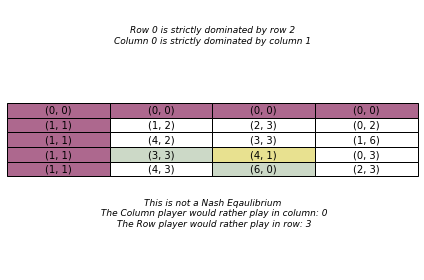

In [ ]:
#@title Inspect a specific cell (0 indexed) { run: "auto" }
row =  3#@param {type:"number"}
column =  2#@param {type:"number"}

drawTable(row,column,payoffs)